<a href="https://colab.research.google.com/github/Followb1ind1y/Machine_Learning_Algorithms/blob/main/ML_Algorithms_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: K-Means Clustering**



## **K-Means Clustering Basics**

The **K-means clustering** method is an **unsupervised** machine learning technique used to identify clusters of data objects in a dataset. There are many different types of clustering methods, but K-means is one of the oldest and most approachable. The algorithm searches for a pre-determined number of clusters within an **unlabeled** multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

* The **Cluster Center (Centroid)** is the arithmetic mean of all the points belonging to the cluster.
* Each point is **closer** to its own cluster center than to other cluster centers.

## **K-Means Clustering Algorithm**

- Step 1: Choose the number of clusters K

- Step 2: Select K random points from the data as centroids

- Step 3: Assign all the points to the closest cluster centroid

- Step 4: Recompute the centroids of newly formed clusters

- Step 5: Repeat steps 3 and 4


## **Inertia and Elbow Method**

**Inertia** is the **sum of squared distance of samples to their closest cluster center**. We would like this number to be as small as possible. But, if we choose K that is equal to the number of samples we will get inertia=0. This is the smallest inertia value we can achieve, however we miss our goal of clustering the data into the optimal number of clusters.

The value of inertia decreases as the number of clusters increase. So we will need to manually pick K while considering the trade-off between the inertia value and the number of clusters. For that, we usually use the **Elbow Method**, and we choose the elbow point in the **inertia graph**. After that point the improvement in the inertia value is not significant.

$$\mathrm{Inertia} = \sum_{i=1}^{N}(x_{i}-C_{k})^{2}$$

## **Dataset Initialization**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
np.random.seed(0)

# radius of the circle
circle_r = 1

# center of the circle (x, y)
circle_x_1, circle_y_1 = 1, 3
circle_x_2, circle_y_2 = 3, 3
circle_x_3, circle_y_3 = 5, 3

# random angle
alpha_1 = 2 * np.math.pi * np.random.rand(50, 1) 
alpha_2 = 2 * np.math.pi * np.random.rand(50, 1) 
alpha_3 = 2 * np.math.pi * np.random.rand(50, 1) 

# random radius
r_1 = circle_r * np.sqrt(np.random.rand(50, 1))
r_2 = circle_r * np.sqrt(np.random.rand(50, 1))
r_3 = circle_r * np.sqrt(np.random.rand(50, 1))

# calculating coordinates
x_1, y_1 = r_1 * np.cos(alpha_1) + circle_x_1, r_1 * np.sin(alpha_1) + circle_y_1
x_2, y_2 = r_2 * np.cos(alpha_2) + circle_x_2, r_2 * np.sin(alpha_2) + circle_y_2
x_3, y_3 = r_3 * np.cos(alpha_3) + circle_x_3, r_3 * np.sin(alpha_3) + circle_y_3

In [102]:
class_1, class_2, class_3 = np.concatenate((x_1, y_1), axis=1), np.concatenate((x_2, y_2), axis=1), np.concatenate((x_3, y_3), axis=1)
zeros, ones, twos = np.zeros((50,1)), np.ones((50,1)), np.ones((50,1))*2
x = np.concatenate((class_1, class_2, class_3), axis=0)
y = np.concatenate((zeros, ones, twos), axis=0).ravel()

Text(0, 0.5, 'Y')

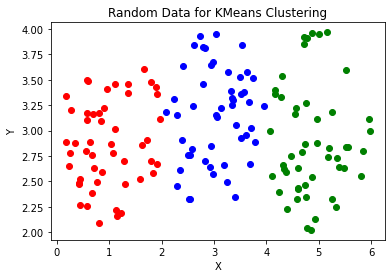

In [103]:
fig, ax = plt.subplots() 
ax.scatter(x[:,0][y==0], x[:,1][y==0], c='r')
ax.scatter(x[:,0][y==1], x[:,1][y==1], c='b')
ax.scatter(x[:,0][y==2], x[:,1][y==2], c='g')
ax.set_title('Random Data for KMeans Clustering')
ax.set_xlabel('X') 
ax.set_ylabel('Y')

## **Implementing K-Means Clustering from scratch**

In [167]:
class KMeansClustering():
    def __init__(self, num_clusters=3, max_iterations=100):
        self.num_clusters = num_clusters
        self.max_iterations = max_iterations
    
    def initialize_random_centroids(self, x):
        centroids = np.zeros((self.num_clusters, x.shape[1]))
        for k in range(self.num_clusters): 
            centroid = x[np.random.choice(range(x.shape[0]))]
            centroids[k] = centroid
        return centroids
    
    def create_cluster(self, x, centroids):
        clusters = [[] for _ in range(self.num_clusters)]
        for i in range(len(x)):
            closest_centroid = np.argmin(np.sqrt(np.sum((x[i]-centroids)**2, axis=1))) 
            clusters[closest_centroid].append(i)
        return clusters
    
    def calculate_new_centroids(self, clusters, x):
        centroids = np.zeros((self.num_clusters, x.shape[1]))
        for i in range(len(clusters)):
            new_centroid = np.mean(x[clusters[i]], axis=0)
            centroids[i] = new_centroid
        return centroids
    
    def get_inertia(self, clusters, centroids):
        inertia = 0
        for i in range(len(centroids)):
            for point in clusters[i]:
                inertia += np.sum((centroids[i] - point)**2)
        return inertia
    
    def fit(self, x):
        self.inertia, self.clusters = [], []
        centroids = self.initialize_random_centroids(x)
        for _ in range(self.max_iterations):
            self.clusters = self.create_cluster(x, centroids)
            self.inertia.append(self.get_inertia(self.clusters, centroids))
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(self.clusters, x)
            diff = centroids - previous_centroids 
            if not diff.any():
                break
        return self
    
    def predict(self, x):
        y_pred = np.zeros(x.shape[0])
        for i in range(len(self.clusters)):
            for j in self.clusters[i]:
                y_pred[j] = i
        return y_pred

In [168]:
k_range = range(1,10)
scores_list = []

for k in k_range:
    kmeans = KMeansClustering(num_clusters=k)
    kmeans.fit(x)
    scores_list.append(kmeans.inertia[-1])

Text(0.5, 1.0, 'Inertia for each K')

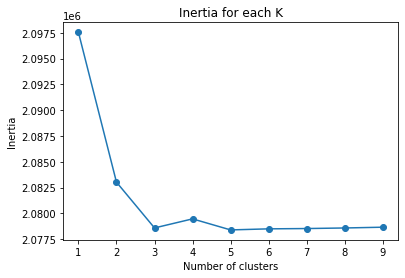

In [169]:
plt.plot(k_range, scores_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Inertia for each K")

In [170]:
kmeans = KMeansClustering(num_clusters=3, max_iterations=3)
kmeans.fit(x)
kmeans.inertia
y_pred = kmeans.predict(x)

Text(0, 0.5, 'Y')

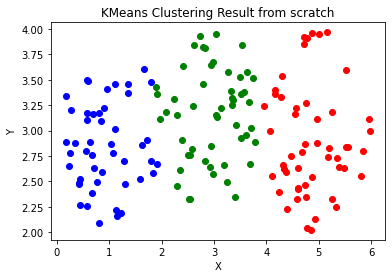

In [171]:
fig, ax = plt.subplots() 
ax.scatter(x[:,0][y_pred==0], x[:,1][y_pred==0], c='r')
ax.scatter(x[:,0][y_pred==1], x[:,1][y_pred==1], c='b')
ax.scatter(x[:,0][y_pred==2], x[:,1][y_pred==2], c='g')
ax.set_title('KMeans Clustering Result from scratch')
ax.set_xlabel('X') 
ax.set_ylabel('Y')

## **Implementing K-Means Clustering from sklearn**

In [27]:
from sklearn.cluster import KMeans

In [172]:
k_range = range(1,10)
scores_list = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    scores_list.append(kmeans.inertia_)

Text(0.5, 1.0, 'Inertia for each K')

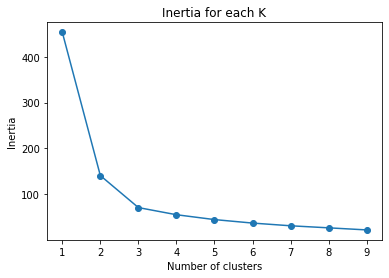

In [173]:
plt.plot(k_range, scores_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Inertia for each K")

In [174]:
## We would pick K=3 from Inertia Graph above
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_pred = kmeans.predict(x)

Text(0, 0.5, 'Y')

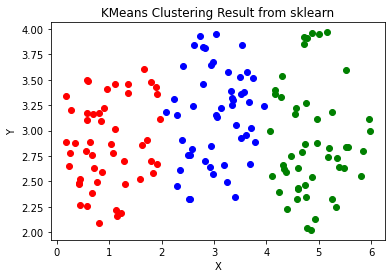

In [175]:
fig, ax = plt.subplots() 
ax.scatter(x[:,0][y_pred==0], x[:,1][y_pred==0], c='r')
ax.scatter(x[:,0][y_pred==1], x[:,1][y_pred==1], c='b')
ax.scatter(x[:,0][y_pred==2], x[:,1][y_pred==2], c='g')
ax.set_title('KMeans Clustering Result from sklearn')
ax.set_xlabel('X') 
ax.set_ylabel('Y')

## **Reference**

* Adinishad. (2021, August 1). KMEANS clustering from scratch. Kaggle. Retrieved January 23, 2023, from `https://www.kaggle.com/code/adinishad/kmeans-clustering-from-scratch` 

In [177]:
%%shell
jupyter nbconvert --to html ML_Algorithms_K_Means_Clustering.ipynb

[NbConvertApp] Converting notebook ML_Algorithms_K_Means_Clustering.ipynb to html
[NbConvertApp] Writing 412078 bytes to ML_Algorithms_K_Means_Clustering.html
